In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Er wordt gesplitst op verschillende leeftijdsgroepen, ook wordt er meteen gesorteerd op overlevende om de grafiek zometeen makkelijker te kunnen maken

In [4]:
df_young_survived = df_train[(df_train['Age'] < 20) & (df_train['Survived'] == 1)].count()
df_young_died = df_train[(df_train['Age'] < 20) & (df_train['Survived'] == 0)].count()

df_20p_survived = df_train[(df_train["Age"] <= 30) & (df_train["Age"] >= 20) & (df_train['Survived'] == 1)].count()
df_20p_died = df_train[(df_train["Age"] <= 30) & (df_train["Age"] >= 20) & (df_train['Survived'] == 0)].count()

df_30p_survived = df_train[(df_train["Age"] < 40) & (df_train["Age"] >= 30)& (df_train['Survived'] == 1)].count()
df_30p_died = df_train[(df_train["Age"] < 40) & (df_train["Age"] >= 30)& (df_train['Survived'] == 0)].count()

df_40p_survived = df_train[(df_train["Age"] <50 ) & (df_train["Age"] >= 40)& (df_train['Survived'] == 1)].count()
df_40p_died = df_train[(df_train["Age"] <50 ) & (df_train["Age"] >= 40)& (df_train['Survived'] == 0)].count()

df_O_survived = df_train[(df_train['Age'] > 50 ) & (df_train['Survived'] == 1)].count()
df_O_died = df_train[(df_train['Age'] > 50) & (df_train['Survived'] == 0)].count()

df_NaN_survived = df_train[(df_train.Age.isnull())  & (df_train['Survived'] == 1)].count()
df_NaN_died = df_train[(df_train.Age.isnull())  & (df_train['Survived'] == 0)].count()


## Hieronder wordt  er eerst een ruw databestand aangemaakt en vervolgens omgezet naar een dataframe die gebruikt gaat worden binnen matplotlib

In [5]:
raw_data ={
    'ageclasses': ['young', '20-30', '30-40', '40-50', '50+','Age Not Available'],
    'survived': [df_young_survived.Survived , df_20p_survived.Survived , df_30p_survived.Survived , df_40p_survived.Survived , df_O_survived.Survived , df_NaN_survived.Survived],
    'died': [df_young_died.Survived , df_20p_died.Survived , df_30p_died.Survived , df_40p_died.Survived , df_O_died.Survived , df_NaN_died.Survived]
}

df_survivors = pd.DataFrame(raw_data, columns=['survived', 'died'])


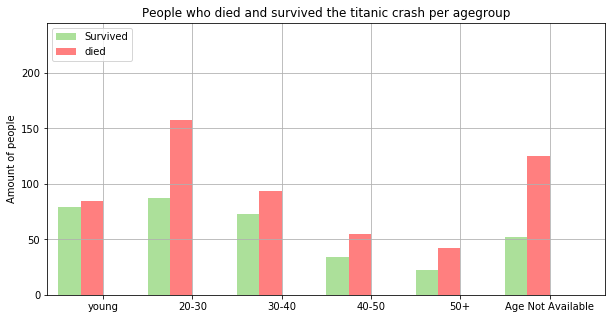

In [6]:
pos = list(range(len(df_survivors['died'])))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos,
        df_survivors['survived'],
        width,
        alpha=0.5,
        color='#5BC236',
        label=raw_data['ageclasses'][0])
plt.bar([p + width for p in pos],
        df_survivors['died'],
        width,
        alpha=0.5,
        color='#FF0000',
        label=raw_data['ageclasses'][1])

# Set the y axis label
ax.set_ylabel('Amount of people')

# Set the chart's title
ax.set_title('People who died and survived the titanic crash per agegroup')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(raw_data['ageclasses'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_survivors['survived'] + df_survivors['died'])] )

# Adding the legend and showing the plot
plt.legend(['Survived', 'died'], loc='upper left')
plt.grid()
plt.show()

## In bovenstaand diagram is te zien dat de meeste bezoekers tussen de leeftijd 20-30 jaar ligt.  Ook is te zien dat het verschil tussen overlevende en doden bij mensen onder de 20 jaar het kleinst is.

In [7]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
namessplits = df_train['Name'].split()


AttributeError: 'Series' object has no attribute 'split'

In [39]:
df_train['Title'] = df_train['Name'].str.split(", ")

In [43]:
df_train['Title'][2]

['Heikkinen', 'Miss. Laina']